In [ ]:
!pip3 install scikit-learn-extra
!pip3 install k-means-constrained
!pip3 install numpy

from k_means_constrained import KMeansConstrained

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import centroid, fcluster

import csv


df = pd.read_csv('Waste Collector Data.csv')

df_for_KMedoid = df.drop(['Customer #'],axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Customer #  300 non-null    int64
 1   X (mts)     300 non-null    int64
 2   Y (mts)     300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [ ]:
df


,Customer #,X (mts),Y (mts)
0,1,61,2979
1,2,173,5352
2,3,295,2301
3,4,723,1031
4,5,870,1779
...,...,...,...
295,296,9839,2585
296,297,9908,3559
297,298,9912,960
298,299,9947,8687


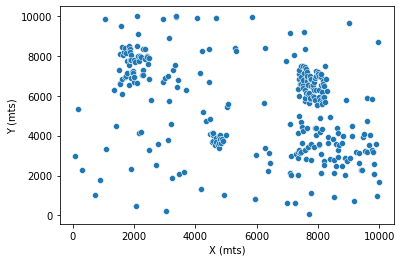

In [ ]:
sns.scatterplot(x=df['X (mts)'],
                y=df['Y (mts)'])

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmedoidsModel = KMedoids(n_clusters=k)
    kmedoidsModel.fit(df)
    distortions.append(kmedoidsModel.inertia_)

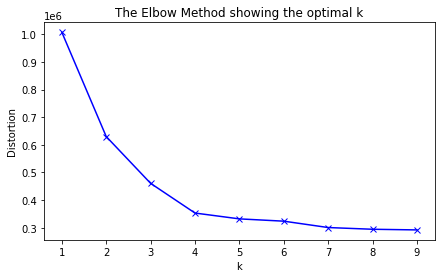

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
model = KMedoids(n_clusters=4,metric='manhattan',random_state=21) 
df_kMedoid = model.fit(df_for_KMedoid)

In [ ]:
model = KMedoids(n_clusters=4,metric='manhattan',random_state=21) 
df_kMedoid = model.fit(df_for_KMedoid)
pred_labels = df_kMedoid.labels_

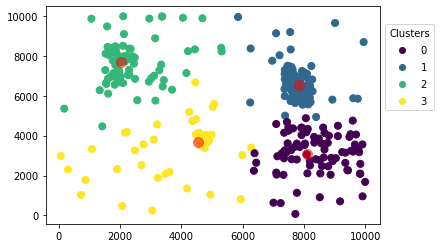

In [ ]:
model = KMedoids(n_clusters=4,metric='manhattan',random_state=21) 
df_kMedoid = model.fit(df_for_KMedoid)
pred_labels = df_kMedoid.labels_
scatter = plt.scatter(df_for_KMedoid['X (mts)'], df_for_KMedoid['Y (mts)'],c=pred_labels, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5);

legend1 = plt.legend(*scatter.legend_elements(),loc="lower left",bbox_to_anchor=(1,0.5), title="Clusters")


In [ ]:
centers

array([[8092, 3063],
       [7847, 6547],
       [2035, 7687],
       [4556, 3679]])

In [ ]:
pred_labels

array([3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 1, 1, 3,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
df_indi = pd.read_csv("Waste Collector Data.csv")
df_indi["Manhattan Cluster"] = pred_labels
print(df_indi)
df_indi.to_csv('Waste Collector Data.csv')

     Customer #  X (mts)  Y (mts)  Manhattan Cluster
0             1       61     2979                  3
1             2      173     5352                  2
2             3      295     2301                  3
3             4      723     1031                  3
4             5      870     1779                  3
..          ...      ...      ...                ...
295         296     9839     2585                  0
296         297     9908     3559                  0
297         298     9912      960                  0
298         299     9947     8687                  1
299         300     9997     1681                  0

[300 rows x 4 columns]


In [ ]:
cluster1 = df_indi.loc[df_indi['Manhattan Cluster'] == 0]
cluster2 = df_indi.loc[df_indi['Manhattan Cluster'] == 1]
cluster3 = df_indi.loc[df_indi['Manhattan Cluster'] == 2]
cluster4 = df_indi.loc[df_indi['Manhattan Cluster'] == 3]

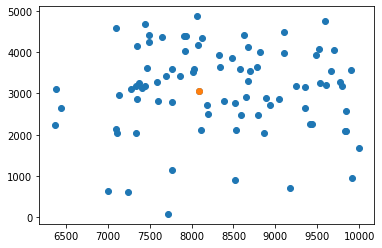

In [ ]:
plt.scatter(cluster1['X (mts)'], cluster1['Y (mts)'])
plt.scatter(centers[0][0],centers[0][1])

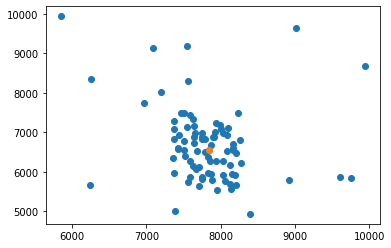

In [ ]:
plt.scatter(cluster2['X (mts)'], cluster2['Y (mts)'])
plt.scatter(centers[1][0],centers[1][1])

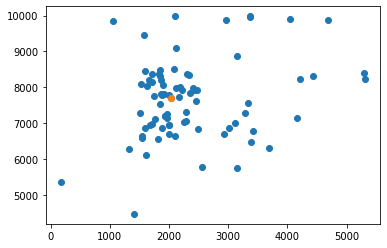

In [ ]:
plt.scatter(cluster3['X (mts)'], cluster3['Y (mts)'])
plt.scatter(centers[2][0],centers[2][1])

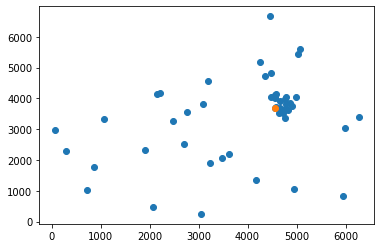

In [ ]:
plt.scatter(cluster4['X (mts)'], cluster4['Y (mts)'])
plt.scatter(centers[3][0],centers[3][1])

In [ ]:
clf1 = KMeansConstrained(n_clusters=9,size_min=7,size_max=10,random_state=0)
clf1.fit_predict(cluster1)
print(clf1.cluster_centers_)
print(clf1.labels_)

[[ 258.7        8567.2        2638.3           0.        ]
 [ 275.3        9138.9        4146.            0.        ]
 [ 243.5        8314.         3722.5           0.        ]
 [ 144.4        7007.7        2713.3           0.        ]
 [ 183.9        7644.2        3281.2           0.        ]
 [ 288.         9590.         1854.            0.        ]
 [ 285.4        9527.3        3182.8           0.        ]
 [ 185.7        7654.5        4445.2           0.        ]
 [ 187.         7670.28571429 1076.14285714    0.        ]]
[3 3 3 8 7 3 3 3 8 3 8 3 3 7 4 4 4 7 4 7 7 4 3 7 4 8 4 8 4 4 7 2 7 2 2 7 2
 4 8 7 0 0 2 2 0 2 0 8 0 2 0 1 0 2 1 2 1 0 1 5 0 0 6 1 1 5 6 6 6 5 5 1 1 6
 1 6 6 1 6 6 5 5 5 6 5 5]


In [ ]:
with open('Cluster1.csv','w')as file:

 cluster1.to_csv(file, mode='a', index=False, header=["Customer","X (mts)","Y (mts)","Clusters"])
df_indi1 = pd.read_csv("Cluster1.csv")
df_indi1["Sub-clusters"] = clf1.labels_
print(df_indi1)
df_indi1.to_csv('Cluster1.csv')

    Customer  X (mts)  Y (mts)  Clusters  Sub-clusters
0        133     6364     2240         0             3
1        134     6386     3120         0             3
2        135     6440     2643         0             3
3        137     7004      641         0             8
4        139     7094     4582         0             7
..       ...      ...      ...       ...           ...
81       295     9838     2088         0             5
82       296     9839     2585         0             5
83       297     9908     3559         0             6
84       298     9912      960         0             5
85       300     9997     1681         0             5

[86 rows x 5 columns]


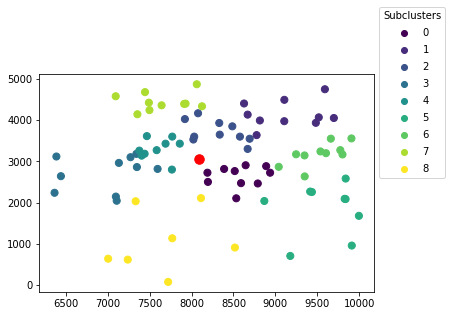

In [ ]:
df_indi11 = pd.read_csv("Cluster1.csv")
scatter = plt.scatter(df_indi11['X (mts)'], df_indi11['Y (mts)'],c=clf1.labels_, s=50, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(),loc="lower left",bbox_to_anchor=(1,0.5), title="Subclusters")
plt.scatter(centers[0][0],centers[0][1], c='red', s=90, alpha=1)

In [ ]:
clf2 = KMeansConstrained(n_clusters=9,size_min=7,size_max=10,random_state=0)
clf2.fit_predict(cluster2)
print(clf2.cluster_centers_)
print(clf2.labels_)


[[1.81600000e+02 7.62780000e+03 6.86880000e+03 1.00000000e+00]
 [2.14200000e+02 7.92490000e+03 6.05040000e+03 1.00000000e+00]
 [2.23100000e+02 8.01170000e+03 7.08090000e+03 1.00000000e+00]
 [1.62700000e+02 7.42750000e+03 7.42220000e+03 1.00000000e+00]
 [1.87571429e+02 7.61028571e+03 9.03885714e+03 1.00000000e+00]
 [1.75600000e+02 7.57500000e+03 6.42760000e+03 1.00000000e+00]
 [1.80000000e+02 7.52050000e+03 5.69150000e+03 1.00000000e+00]
 [2.33700000e+02 8.10940000e+03 6.54190000e+03 1.00000000e+00]
 [2.58500000e+02 8.67025000e+03 5.66450000e+03 1.00000000e+00]]
[4 6 4 3 4 3 5 3 0 6 3 6 5 5 0 3 3 5 0 5 4 3 6 4 6 3 5 5 3 0 3 0 0 1 5 1 6
 0 0 0 6 6 0 5 5 1 7 1 1 7 6 2 2 2 2 1 6 2 2 2 7 1 1 7 2 2 8 1 8 1 7 7 7 8
 7 8 2 7 7 8 8 4 8 8 4]


In [ ]:
with open('Cluster2.csv','w')as file:

 cluster2.to_csv(file, mode='a', index=False, header=["Customer","X (mts)","Y (mts)","Clusters"])
df_indi2 = pd.read_csv("Cluster2.csv")
df_indi2["Sub-clusters"] = clf2.labels_
print(df_indi2)
df_indi2.to_csv('Cluster2.csv')

    Customer  X (mts)  Y (mts)  Clusters  Sub-clusters
0        127     5848     9944         1             4
1        130     6244     5657         1             6
2        131     6258     8366         1             4
3        136     6964     7753         1             3
4        138     7089     9129         1             4
..       ...      ...      ...       ...           ...
80       271     8926     5803         1             8
81       273     9014     9643         1             4
82       288     9609     5871         1             8
83       291     9757     5851         1             8
84       299     9947     8687         1             4

[85 rows x 5 columns]


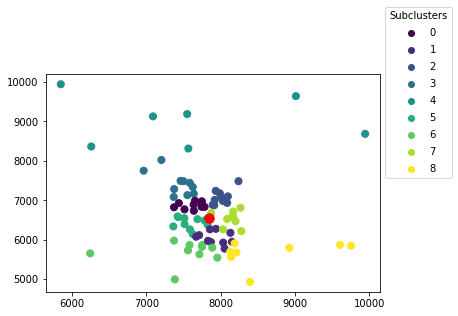

In [ ]:
df_indi12 = pd.read_csv("Cluster2.csv")
scatter = plt.scatter(df_indi12['X (mts)'], df_indi12['Y (mts)'],c= clf2.labels_, s=50, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(),loc="lower left",bbox_to_anchor=(1,0.5), title="Subclusters")
plt.scatter(centers[1][0],centers[1][1], c='red', s=90, alpha=1)

In [ ]:
clf3 = KMeansConstrained(n_clusters=8,size_min=7,size_max=10,random_state=0)
clf3.fit_predict(cluster3)
print(clf3.cluster_centers_)
print(clf3.labels_)


[[2.7000e+01 1.7890e+03 8.1799e+03 2.0000e+00]
 [8.0800e+01 3.1817e+03 6.7543e+03 2.0000e+00]
 [2.9500e+01 1.8098e+03 7.0300e+03 2.0000e+00]
 [4.1100e+01 1.9973e+03 9.0386e+03 2.0000e+00]
 [2.4800e+01 1.6084e+03 6.1082e+03 2.0000e+00]
 [5.8000e+01 2.2839e+03 7.5111e+03 2.0000e+00]
 [9.9000e+01 4.2033e+03 8.8898e+03 2.0000e+00]
 [4.0700e+01 1.9803e+03 7.7786e+03 2.0000e+00]]
[4 3 4 4 2 0 4 4 3 3 2 4 0 0 2 0 0 2 7 2 4 0 7 3 0 0 7 7 2 0 7 5 2 5 2 4 2
 2 7 7 3 4 3 7 3 7 0 7 5 5 5 3 3 5 5 5 5 5 1 4 1 3 1 1 6 1 1 1 6 6 1 1 1 6
 6 6 6 6 6 6]


In [ ]:
with open('Cluster3.csv','w')as file:

 cluster3.to_csv(file, mode='a', index=False, header=["Customer","X (mts)","Y (mts)","Clusters"])
df_indi3 = pd.read_csv("Cluster3.csv")
df_indi3["Sub-clusters"] = clf3.labels_
print(df_indi3)
df_indi3.to_csv('Cluster3.csv')

    Customer  X (mts)  Y (mts)  Clusters  Sub-clusters
0          2      173     5352         2             4
1          6     1061     9858         2             3
2          8     1332     6276         2             4
3          9     1415     4465         2             4
4         10     1513     7283         2             2
..       ...      ...      ...       ...           ...
75        95     4214     8231         2             6
76        98     4439     8321         2             6
77       111     4685     9880         2             6
78       125     5297     8397         2             6
79       126     5312     8216         2             6

[80 rows x 5 columns]


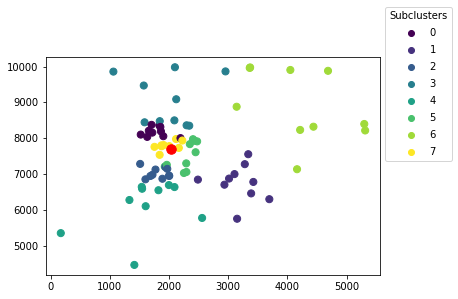

In [ ]:
df_indi13 = pd.read_csv("Cluster3.csv")
scatter = plt.scatter(df_indi13['X (mts)'], df_indi13['Y (mts)'],c=clf3.labels_, s=50, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(),loc="lower left",bbox_to_anchor=(1,0.5), title="Subclusters")
plt.scatter(centers[2][0],centers[2][1],c='red', s=90, alpha=1)

In [ ]:
clf4 = KMeansConstrained(n_clusters=5,size_min=7,size_max=10,random_state=0)
clf4.fit_predict(cluster4)
print(clf4.cluster_centers_)
print(clf4.labels_)


[[1.18700000e+02 5.07230000e+03 3.57460000e+03 3.00000000e+00]
 [1.08500000e+02 4.64190000e+03 3.89460000e+03 3.00000000e+00]
 [3.04000000e+01 1.45500000e+03 2.88900000e+03 3.00000000e+00]
 [1.00700000e+02 4.30720000e+03 4.90550000e+03 3.00000000e+00]
 [8.86666667e+01 3.68933333e+03 1.39922222e+03 3.00000000e+00]]
[2 2 2 2 2 2 4 2 2 2 4 2 4 3 3 4 4 4 4 3 3 3 1 3 3 1 1 1 1 3 0 1 1 0 0 0 1
 1 1 0 0 0 4 0 3 3 4 0 0]


In [ ]:
with open('Cluster4.csv','w')as file:

 cluster4.to_csv(file, mode='a', index=False, header=["Customer","X (mts)","Y (mts)","Clusters"])
df_indi4 = pd.read_csv("Cluster4.csv")
df_indi4["Sub-clusters"] = clf4.labels_
print(df_indi4)
df_indi4.to_csv('Cluster4.csv')

    Customer  X (mts)  Y (mts)  Clusters  Sub-clusters
0          1       61     2979         3             2
1          3      295     2301         3             2
2          4      723     1031         3             2
3          5      870     1779         3             2
4          7     1080     3328         3             2
5         35     1899     2324         3             2
6         47     2065      471         3             4
7         53     2157     4154         3             2
8         56     2220     4177         3             2
9         68     2480     3259         3             2
10        71     2697     2523         3             4
11        72     2765     3558         3             2
12        76     3052      249         3             4
13        77     3096     3802         3             3
14        81     3202     4562         3             3
15        82     3235     1888         3             4
16        89     3477     2074         3             4
17        

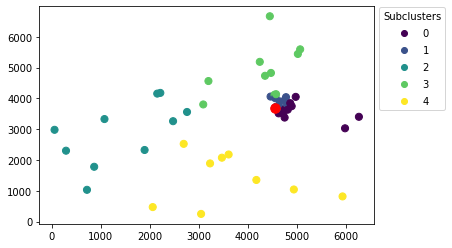

In [ ]:
df_indi14 = pd.read_csv("Cluster4.csv")
scatter = plt.scatter(df_indi14['X (mts)'], df_indi14['Y (mts)'],c=clf4.labels_, s=50, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(),loc="lower left",bbox_to_anchor=(1,0.5), title="Subclusters")
plt.scatter(centers[3][0],centers[3][1], c='red', s=90, alpha=1)